# Programación Python para Machine Learning.

## Autor: Victor Simo Lozano

## Actividad 3
<p>Tratamiento de valores perdidos.</p>
    

<hr style="border-color:red">

In [1]:
# Generales 
from pandas import read_csv, DataFrame
import numpy as np
import matplotlib.pyplot as plt

<div style="font-size:14px; text-align:justify"><b>PRIMERA PARTE.-</b><br></div>

Cargar el Dataset "*Breast Cancer Wisconsin*" del repositorio UCI Machine Learning y desarrollar los siguientes puntos:
- Localizar el numero de datos faltantes en el dataset.
- Aplicar estrategias de eliminación de valores faltantes vistas.
- Aplicar estratrgias de imputación univariantes y multivariantes vistas.
- Comparar gráficamente los resultados tras la imputación.

***Fuente:*** *https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29*

In [2]:
names=['id number', 'Clump Tickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal adhesion', 'Single Epithelial Cell Size',
      'Bare Nuclei', 'Bland Chromatin', 'Normal Nuc leoli', 'Mitoses', 'Class']

# Carga del dataset
df=read_csv('breast-cancer-wisconsin.csv', names=names)

# Explicación valores objetivo
df['Class']=df['Class'].replace(2,'Benign')
df['Class']=df['Class'].replace(4,'Malignant')

# Representación de los datos
df

,id number,Clump Tickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nuc leoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,Benign
1,1002945,5,4,4,5,7,10,3,2,1,Benign
2,1015425,3,1,1,1,2,2,3,1,1,Benign
3,1016277,6,8,8,1,3,4,3,7,1,Benign
4,1017023,4,1,1,3,2,1,3,1,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,Benign
695,841769,2,1,1,1,2,1,1,1,1,Benign
696,888820,5,10,10,3,7,3,8,10,2,Malignant
697,897471,4,8,6,4,3,4,10,6,1,Malignant


<div style="font-size:14px; text-align:justify"><b>1: </b>Localizar numero de datos faltantes.</div>

In [3]:
df.info(), df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id number                    699 non-null    int64 
 1   Clump Tickness               699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nuc leoli             699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    object
dtypes: int64(9), object(2)
memory usage: 60.2+ KB


(None,
 id number                      0
 Clump Tickness                 0
 Uniformity of Cell Size        0
 Uniformity of Cell Shape       0
 Marginal adhesion              0
 Single Epithelial Cell Size    0
 Bare Nuclei                    0
 Bland Chromatin                0
 Normal Nuc leoli               0
 Mitoses                        0
 Class                          0
 dtype: int64)

Mediante el método *.info()* se puede observar que de las 699 filas que tiene el dataframe, todos los atributos y variable objetivo tienen 699 datos, es decir, no se aprecia ningún datos faltante.<br>
Si seguimos analizando, vemos que todos los datos, según la presentación del dataframe, son numericos (de 0 a 10 según la información de la fuente). Pero, para el atributo **Bare Nuclei** tenemos como resultado de *Dtype* el tipo *object*, esto nos indica que existe algún valor que no es numerico y por ende toda la columna se "corrompe". No obstante, vemos que no existe valores nulos para ninguna de las columnas.

In [4]:
df['Bare Nuclei'].unique(), df['Class'].unique()

(array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
       dtype=object),
 array(['Benign', 'Malignant'], dtype=object))

Al mostrar los datos únicos del atributo en cuestión, se observa que existe el caracter '?' para los valores perdidos, por tanto, se va a transformar en un tipo **np.NaN**.<br>
Adicionalmente, se representa los valores unicos para el atributo Class, siendo todos ellos los correctos y sin datos faltantes.

In [5]:
# Convertir los ? a valor np.NaN
df[df=='?']=np.NaN

# Comprobar valores nulos
df.isnull().sum()

id number                       0
Clump Tickness                  0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nuc leoli                0
Mitoses                         0
Class                           0
dtype: int64

Ahora si, una vez existe en nuestra columnas **NaN**, el cual se reconoce como un valor nulo, podemos conocer el total de los datos faltantes. En cuyo caso es **16 datos perdidos**.

<div style="font-size:14px; text-align:justify"><b>2: </b>Aplicar estrategias de eliminación de valores faltantes vistas.</div>

Para poder ver el cambio que puede sufrir el dataframe con la eliminación de valores para el atributo *Bare Nuclei*, primero se convierte esta columna en tipo numérico, de tal modo, podremos comparar datos de la estadistica descriptiva del atributo.

In [6]:
# Conversión a tipo float y muestra de parámetros
df[['Bare Nuclei']] = df[['Bare Nuclei']].astype(float)

df.describe(include='all')

,id number,Clump Tickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nuc leoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,458
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,NaN
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,NaN
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,NaN
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,NaN
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,NaN


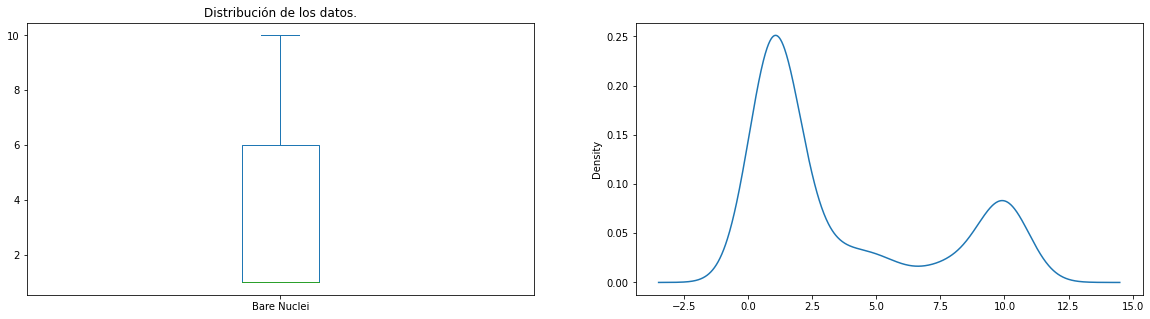

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,5))

df['Bare Nuclei'].plot(kind='box', ax=axes[0]).set_title('Distribución de los datos.')
df['Bare Nuclei'].plot(kind='density', ax=axes[1])

plt.show()

Con ayuda de los gráficos mostrados, se observa como los datos se concentran en torno al 1 y al 10, con un sesgo positivo, hacia la derecha. Además, no se observa valores atípicos puesto que todas las instancias se encuentran dentro del rango de 0 a 10.

<div style="font-size:14px; text-align:center"><b>Eliminación de instancias o atributos con datos perdidos.</b><br></div>

Para esta metodología, se podría eliminar de acuerdo con:
- Filas y/o columnas con al menos un valor faltante.
- Filas y/o columnas con todos los atributos faltantes.
- Filas y/o columnas con 'n' valores faltantes.

Como se ha comprobado, unicamente existe una columa con datos faltantes, *Bare Nuclei*, por lo que eliminar la columa podría ser una solución. También, en el caso de querer mantener la columna, se podría eliminar todas las instancias con NaN ya que se habla de 16 filas.

No obstante, para este caso, únicamente se va a eliminar las instancias que contengan datos perdidos en nuestro set de datos. Esto se debe a que es la única metodología con la que se podría realizar alguna comparación respecto a los datos originales. En el caso de que eliminasemos la columna, se debería comparar modelos y esta práctica no se basa en el cálculo de modelos.

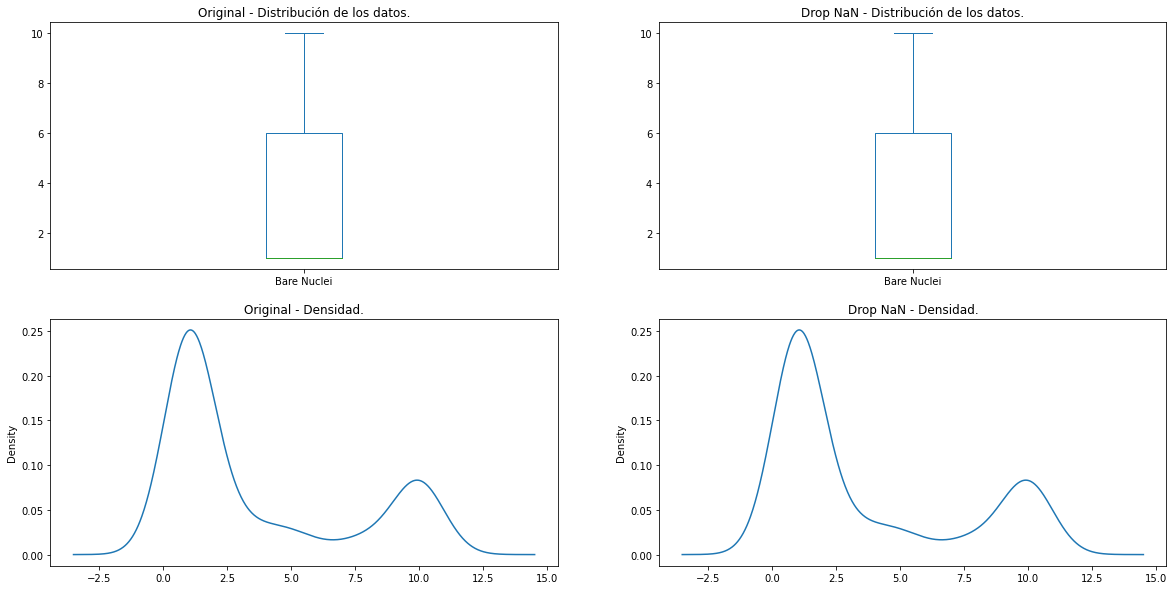

(count    683.000000
 mean       3.544656
 std        3.643857
 min        1.000000
 25%        1.000000
 50%        1.000000
 75%        6.000000
 max       10.000000
 Name: Bare Nuclei, dtype: float64,
 count    683.000000
 mean       3.544656
 std        3.643857
 min        1.000000
 25%        1.000000
 50%        1.000000
 75%        6.000000
 max       10.000000
 Name: Bare Nuclei, dtype: float64,
 None)

In [8]:
# Eliminar filas con NaN
df_drop_NaN=df.dropna(axis=0)

# Comparación con modelo original
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,10))

df['Bare Nuclei'].plot(kind='box', ax=axes[0, 0]).set_title('Original - Distribución de los datos.')
df['Bare Nuclei'].plot(kind='density', ax=axes[1, 0]).set_title('Original - Densidad.')

df_drop_NaN['Bare Nuclei'].plot(kind='box', ax=axes[0, 1]).set_title('Drop NaN - Distribución de los datos.')
df_drop_NaN['Bare Nuclei'].plot(kind='density', ax=axes[1, 1]).set_title('Drop NaN - Densidad.')

df_drop_NaN['Bare Nuclei'].describe(), df['Bare Nuclei'].describe(), plt.show()

Como se puede observar, la eliminación de todas las instancias con valores nulos, no implica ninguna alteración en la estadistica descriptiva de este atributo.

<div style="font-size:14px; text-align:center"><b>Viabilidad de la eliminación de datos.</b><br></div>

Como se ha mencionado, existe la opción de eliminar las filas y/o columnas con datos faltantes. A continuación, se verá las opciones para la toma de decisiones.

In [9]:
# Correlación de los atributos
corr=df.corr()

corr.style.background_gradient(cmap='pink')

,id number,Clump Tickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nuc leoli,Mitoses
id number,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.099248,-0.060051,-0.052072,-0.034901
Clump Tickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.593091,0.558428,0.535835,0.350034
Uniformity of Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.691709,0.755721,0.722865,0.458693
Uniformity of Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.713878,0.735948,0.719446,0.438911
Marginal adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.670648,0.666715,0.603352,0.417633
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.585716,0.616102,0.628881,0.479101
Bare Nuclei,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210
Bland Chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.680615,1.000000,0.665878,0.344169
Normal Nuc leoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.584280,0.665878,1.000000,0.428336
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.339210,0.344169,0.428336,1.000000


Para el metodo de eliminación de columnas, se puede emplear la matriz de correlaciones de los atributos.<br>
En el caso de *Bare Nuclei*, vemos que tiene una correlación superior al 0.5 en 7 de 9 atributos. Y una correlación de 0.71 con *Uniformity of Cell Shape*. Aunque, no se trata de correlaciones muy fuertes por lo que no sería buena idea la eliminación de este atributo.

In [10]:
# Dataframe por clases
df_benign=df[df['Class']=='Benign']
df_malignant=df[df['Class']=='Malignant']

# Calculo de pesos
perc_nan_benign=(df_benign['Bare Nuclei'].isnull().sum()/ df_benign['Class'].count())*100
perc_nan_malignant=(df_malignant['Bare Nuclei'].isnull().sum()/ df_malignant['Class'].count())*100
perc_benign=(df_benign['Class'].count()/df['Class'].count())*100
perc_malignant=(df_malignant['Class'].count()/df['Class'].count())*100

print(f'''El {perc_nan_benign:0.2f}% de las instancias de la clase Benigna son NaN.\n
El {perc_nan_malignant:0.2f}% de las instancias de la clase Maligna son NaN.\n
El {perc_benign:0.2f}% de los datos son de la clase Benigna.\n
El {perc_malignant:0.2f}% de los datos son de la clase Maligna.''')

El 3.06% de las instancias de la clase Benigna son NaN.

El 0.83% de las instancias de la clase Maligna son NaN.

El 65.52% de los datos son de la clase Benigna.

El 34.48% de los datos son de la clase Maligna.


En base a los resultados obtenidos, teniendo en cuenta que solo el 0.8% de los datos de la clase minoritaria (clase Maligna con un 34.48%) y que el 3.06% para la clase mayoritaria son valores perdidos. Se considera que aplicar la eliminación de filas de valores perdidos, no afectaría en la solución final de modelo.

<div style="font-size:14px; text-align:justify"><b>3: </b>Aplicar estrategias de imputación univariantes y multivariantes vistas.</div>

Como metodo alternativo a lidiar con valores perdidos, existe la imputación de nuevos valores.

<div style="font-size:14px; text-align:center"><b>Imputación Univariante.</b><br></div>

Se trata de la sustición de los valores perdidos por uno que sea común a todos, por el número anterior o posterior al nulo o mediante la interpolación.

- Imputación por una constante: En este caso, se busca un valor que sea representativo dentro del conjunto de datos, un valor distinto a todos los demas. En este caso, se decide reemplazar por el 0. Un valor que no posee ninguno de los otros datos.

In [11]:
# Sustitución por constante
df_imp_const=df.fillna(0)
print(f'''Valores de la serie: {list(df_imp_const['Bare Nuclei'].unique())}''')

Valores de la serie: [1.0, 10.0, 2.0, 4.0, 3.0, 9.0, 7.0, 0.0, 5.0, 8.0, 6.0]


- Valor anterior o posterior: Este metodo resulta interesante cuando se trata de un conjunto de datos correlativos entre ellos o por ejemplo valores acumulativos.<br>
Para este caso, se ordena el dataframe por las 3 columnas de mayor correlación con *Bare Nuclei* y se le asignará el siguiente valor.

In [12]:
# Ordenado de los valores
df_imp_next=df.sort_values(by=['Uniformity of Cell Shape', 'Uniformity of Cell Size', 'Marginal adhesion'], ascending=True)

# Imputación con el siguiente valor
# Lista con los valores de la unica fila afectada
bare_nuclei=df_imp_next['Bare Nuclei'].fillna(method='ffill')
# Asignado de valores a atributo *Bare Nuclei*
df_imp_next['Bare Nuclei']=bare_nuclei
print(f'''Valores de la serie: {list(df_imp_next['Bare Nuclei'].unique())}''')

Valores de la serie: [1.0, 2.0, 10.0, 3.0, 5.0, 4.0, 6.0, 7.0, 8.0, 9.0]


- Interpolación: Para este caso, se deseigna el valor perdido de acuerdo a la interpolación lineal para hallar el valor desconocido.

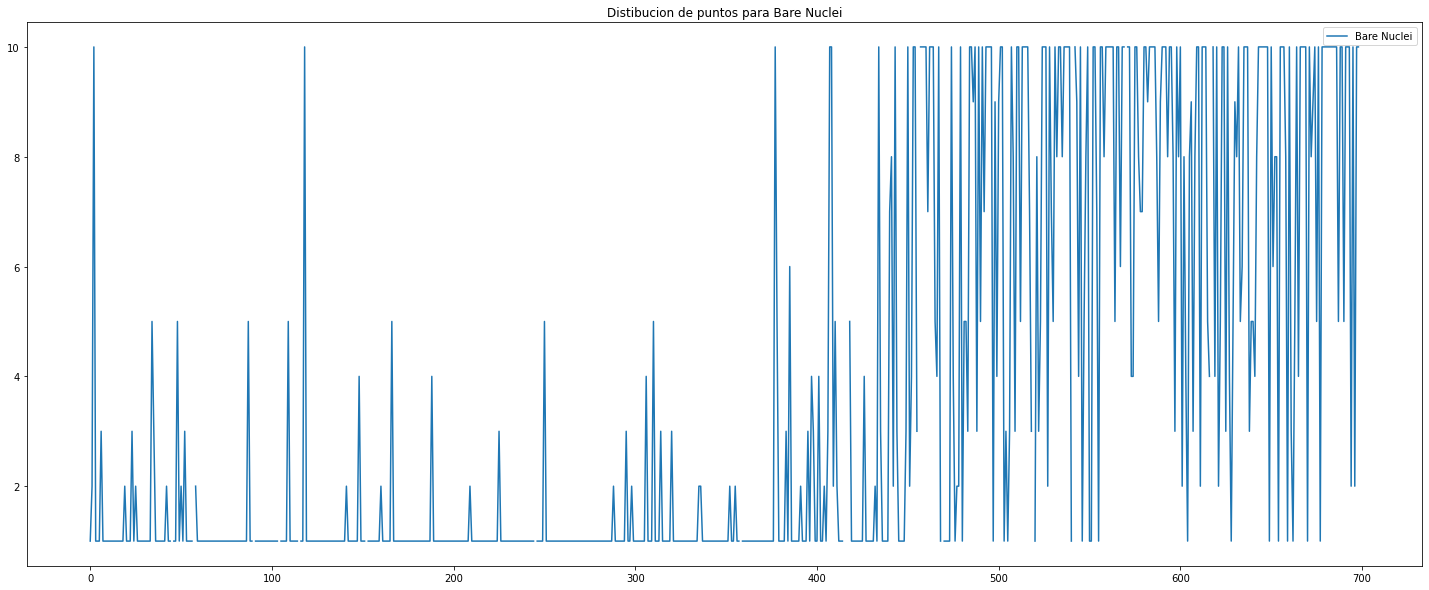

Valores de la serie: [ 1.  2. 10.  3.  5. nan  4.  6.  7.  8.  9.]


In [13]:
# Ordenado de los valores
df_imp_int=df.sort_values(by=['Uniformity of Cell Shape', 'Uniformity of Cell Size', 'Marginal adhesion'], ascending=True)

# Extracción de los datos de Bare Nuclei
bare_nuclei=df_imp_int['Bare Nuclei']
# Manipulación de indice ascendente
bare_nuclei=bare_nuclei.reset_index().drop('index', axis=1)
# Ploteo de los resultados
bare_nuclei.plot(figsize=(25, 10)).set_title('Distibucion de puntos para Bare Nuclei')
plt.show()
print(f'''Valores de la serie: {bare_nuclei['Bare Nuclei'].unique()}''')

Aunque con picos durante la sucesión de los datos, se puede apreciar una tendencia ascendente del valor de *Bare Nuclei*, además, se ve cómo existe los datos faltantes con el valor **nan**. Con este orden de datos, se interpola los resultados para hallar el valor perdido de cada NaN.

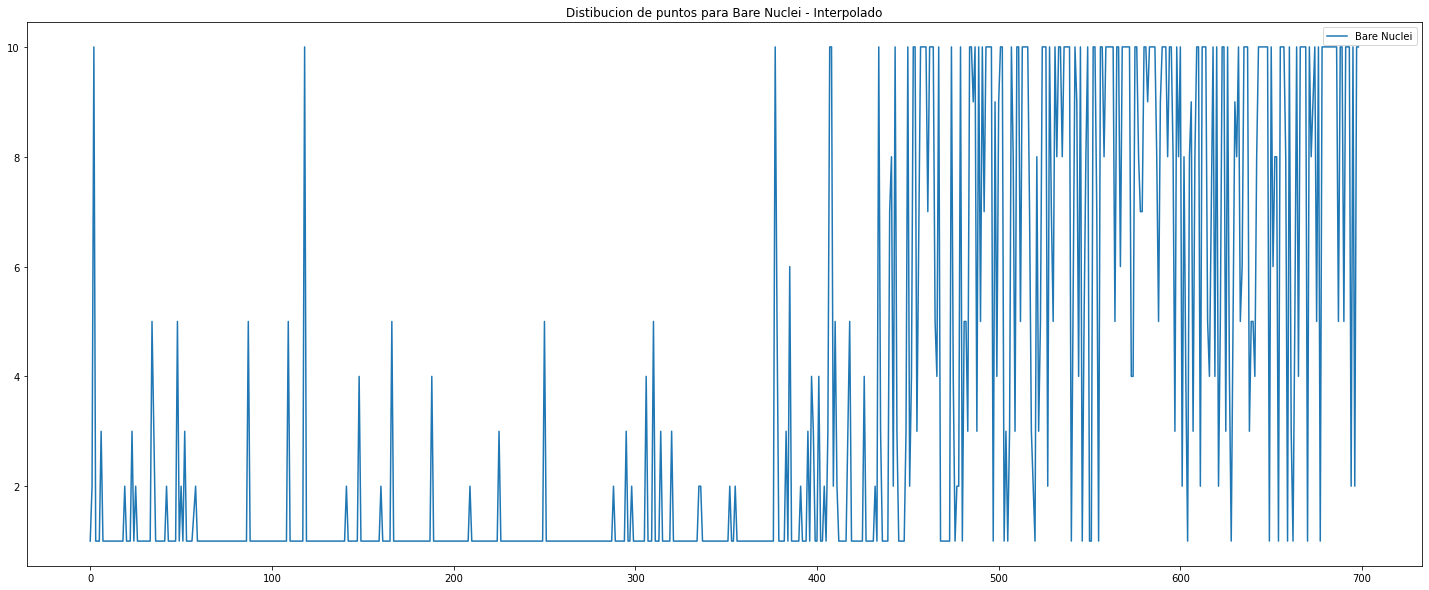

Valores de la serie: [ 1.   2.  10.   3.   5.   1.5  4.   6.   7.   8.   6.5  9.   5.5]


In [14]:
# Interpolación de las instancias nulas
bare_nuclei=bare_nuclei.interpolate(method ='linear', limit_direction ='forward')

# Ploteo de los resultados
bare_nuclei.plot(figsize=(25, 10)).set_title('Distibucion de puntos para Bare Nuclei - Interpolado')
plt.show()
print(f'''Valores de la serie: {bare_nuclei['Bare Nuclei'].unique()}''')

# Asignacion de valores a dataframe
df_imp_int['Bare Nuclei']=bare_nuclei

Con este resultado, se aprecia la misma evolución de los datos además de la sustitución de los valores nan por nuevos.

- Imputación scikit-Learn: Como herramienta para el análisis de datos que se trata, esta nos ofrece metodos básicos con los que imputar valores (constantes o valores estadísticos).<br>
Para este caso, se va a imputar valores perdidos con la media de los valores.

In [20]:
from sklearn.impute import SimpleImputer

# Instancia de sklearn para imputación
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Datos sobre los que imputar
bare_nuclei=df[['Bare Nuclei']]
# Imputación según la instancia escogida
imputer.fit(bare_nuclei)
bare_nuclei=imputer.transform(bare_nuclei)

# Asignación de los datos en dataframe
df_imp_mean=df
df_imp_mean['Bare Nuclei']=bare_nuclei

print(f'''Valores de la serie: {list(df_imp_mean['Bare Nuclei'].unique())}''')

Valores de la serie: [1.0, 10.0, 2.0, 4.0, 3.0, 9.0, 7.0, 3.5446559297218156, 5.0, 8.0, 6.0]


<div style="font-size:14px; text-align:justify"><b>4: </b>Compración gráfica de los resultados tras la imputación.</div>

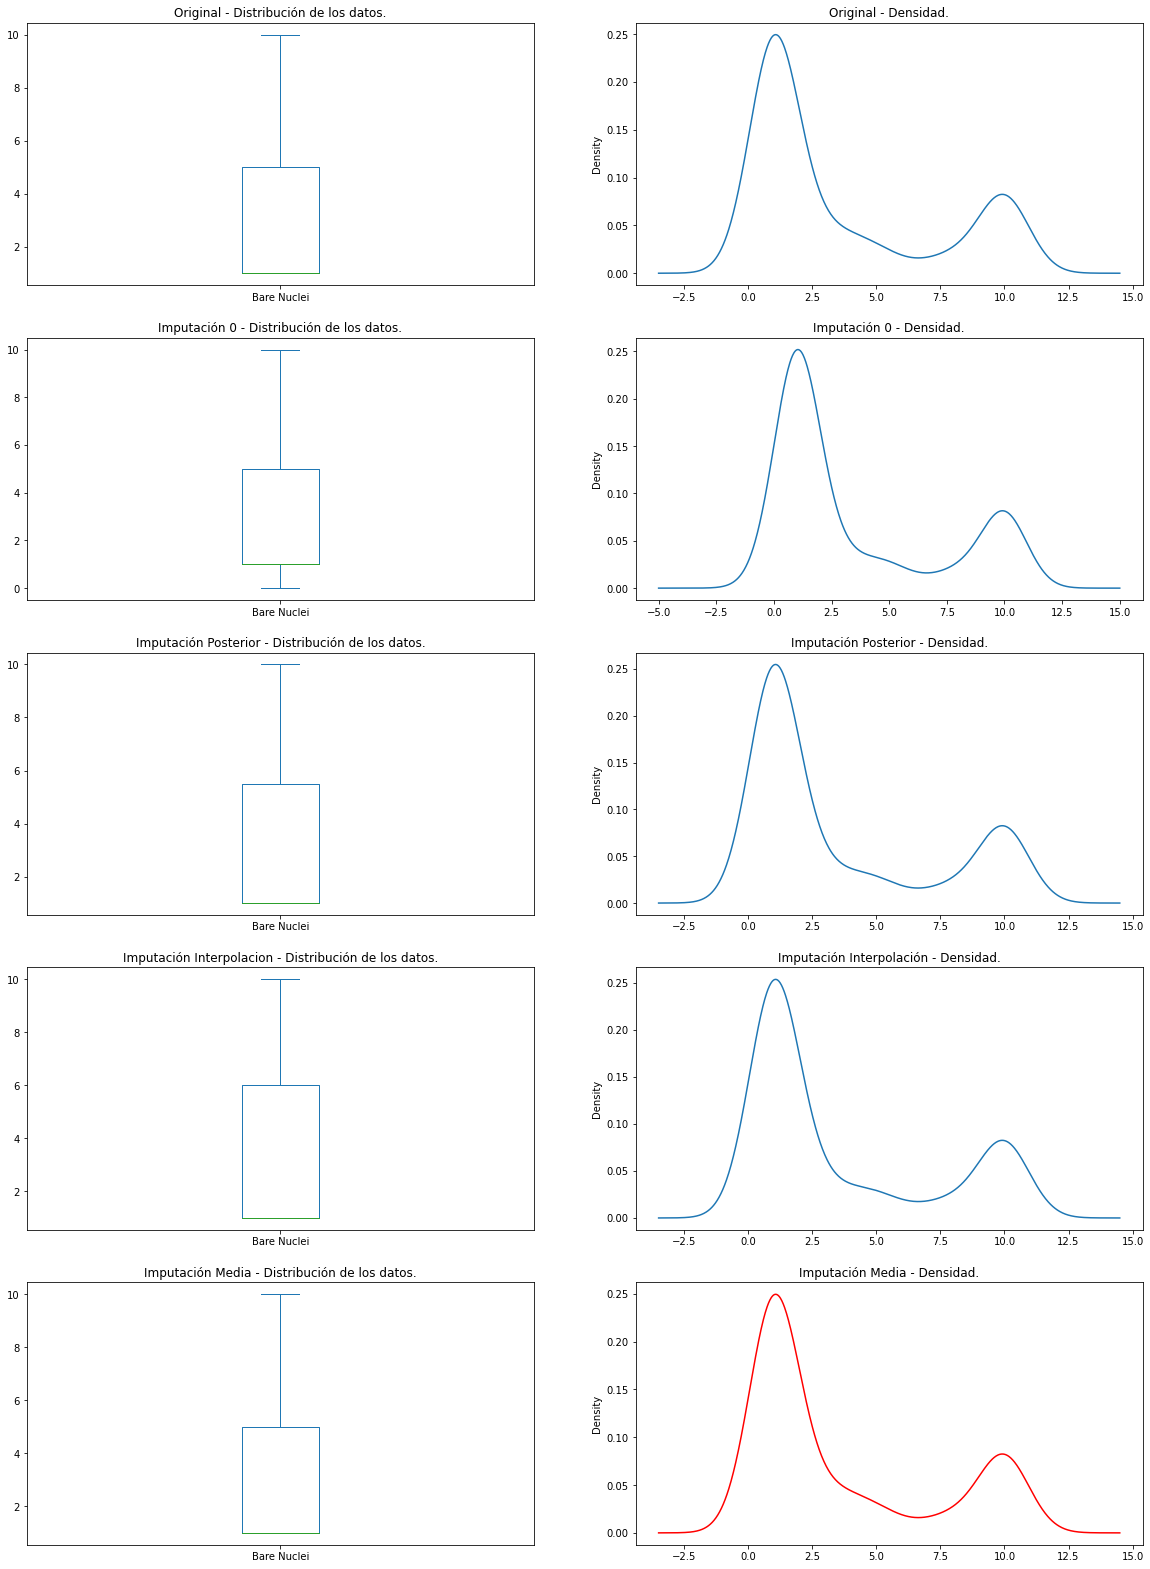

(count    699.000000
 mean       3.544656
 std        3.601852
 min        1.000000
 25%        1.000000
 50%        1.000000
 75%        5.000000
 max       10.000000
 Name: Bare Nuclei, dtype: float64,
 count    699.000000
 mean       3.463519
 std        3.640708
 min        0.000000
 25%        1.000000
 50%        1.000000
 75%        5.000000
 max       10.000000
 Name: Bare Nuclei, dtype: float64)

In [38]:
# Comparación con modelo original
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(20,28))

df['Bare Nuclei'].plot(kind='box', ax=axes[0, 0]).set_title('Original - Distribución de los datos.')
df['Bare Nuclei'].plot(kind='density', ax=axes[0, 1]).set_title('Original - Densidad.')

df_imp_const['Bare Nuclei'].plot(kind='box', ax=axes[1, 0]).set_title('Imputación 0 - Distribución de los datos.')
df_imp_const['Bare Nuclei'].plot(kind='density', ax=axes[1, 1]).set_title('Imputación 0 - Densidad.')

df_imp_next['Bare Nuclei'].plot(kind='box', ax=axes[2, 0]).set_title('Imputación Posterior - Distribución de los datos.')
df_imp_next['Bare Nuclei'].plot(kind='density', ax=axes[2, 1]).set_title('Imputación Posterior - Densidad.')

df_imp_int['Bare Nuclei'].plot(kind='box', ax=axes[3, 0]).set_title('Imputación Interpolacion - Distribución de los datos.')
df_imp_int['Bare Nuclei'].plot(kind='density', ax=axes[3, 1]).set_title('Imputación Interpolación - Densidad.')

df_imp_mean['Bare Nuclei'].plot(kind='box', ax=axes[4, 0]).set_title('Imputación Media - Distribución de los datos.')
df_imp_mean['Bare Nuclei'].plot(kind='density', ax=axes[4, 1], color='red').set_title('Imputación Media - Densidad.')

plt.show()

df['Bare Nuclei'].describe(), df_imp_const['Bare Nuclei'].describe(), 